##EDA1
1.  What is the range of selling prices in the dataset?
2.  What is the median selling price for bikes in the dataset?  
3.  What is the most common seller type?
4.  How many bikes have driven more than 50,000 kilometers?
5. What is the average km_driven value for each ownership type?
6. What proportion of bikes are from the year 2015 or older?
7. What is the trend of missing values across the dataset?
8. What is the highest ex_showroom_price recorded, and for which bike?
9. What is the total number of bikes listed by each seller type?
10. What is the relationship between selling_price and km_driven for first-owner bikes?
11. Identify and remove outliers in the km_driven column using the IQR method?
12. Perform a bivariate analysis to visualize the relationship between year and selling_price?
13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
14. Which bike names are priced significantly above the average price for their manufacturing year?
15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.


###ANSWERS

1. Range of Selling Prices
Context: The range gives us the variability of selling prices in the dataset. It helps us understand the span of target variable values, critical for regression problems.

In [ ]:
selling_price_range = (bike_data['selling_price'].min(), bike_data['selling_price'].max())


Explanation: A wide range (₹5,000 to ₹7,60,000) indicates diverse bike prices. Outliers could be present in premium bikes, which should be handled for regression modeling to avoid skewed predictions.

2. Median Selling Price
Context: The median is robust against outliers and provides a central tendency measure. For machine learning models, it is a helpful baseline to compare predictions.
Explanation: The median selling price (₹45,000) shows that most bikes are relatively inexpensive. In a regression task, we can compare this baseline with model predictions to evaluate performance.

In [ ]:
median_selling_price = bike_data['selling_price'].median()


3. Most Common Seller Type
Context: Seller type is a categorical feature. Knowing the dominant category helps in feature engineering and one-hot encoding for machine learning models.
Explanation: "Individual" sellers dominate the data, meaning most transactions involve personal sellers. Imbalanced categories might require techniques like oversampling if this feature is used in classification.

In [ ]:
most_common_seller_type = bike_data['seller_type'].value_counts().idxmax()


4. Number of Bikes Driven More Than 50,000 Kilometers
Context: Bikes with higher kilometers might significantly impact the resale value, serving as an important feature in regression models.
Explanation: 170 bikes exceed 50,000 km. These values could represent older or heavily used bikes, which are critical in price prediction.

In [ ]:
bikes_above_50000_km = bike_data[bike_data['km_driven'] > 50000].shape[0]


5. Average km_driven by Ownership Type
Context: Ownership type and km_driven are correlated. High usage indicates higher depreciation, which is essential in regression and feature interaction
Explanation:
1st owners: 32,816 km (less used, higher resale value).
2nd and 3rd owners: Higher km driven (39,288 km and 33,292 km, respectively).
4th owner: Outlier (3,11,500 km). These insights help create ownership-specific depreciation models.

In [ ]:
average_km_by_owner = bike_data.groupby('owner')['km_driven'].mean()


6. Proportion of Bikes from 2015 or Older
Context: Older bikes often have lower prices due to depreciation, making manufacturing year a crucial feature for regression models.
Explanation: 56.64% of bikes are from 2015 or older, confirming that depreciation is a common trend in this dataset.


In [ ]:
bikes_2015_or_older = bike_data[bike_data['year'] <= 2015].shape[0]
proportion_2015_or_older = bikes_2015_or_older / bike_data.shape[0]


7. Missing Value Trends
Context: Missing values indicate incomplete data, which may require imputation or exclusion in machine learning pipelines.
Explanation: Only the ex_showroom_price column has missing values (435 rows). These can be imputed using median or mean if the column is critical for predictions.

In [ ]:
missing_values_trend = bike_data.isnull().sum()

8. Highest ex_showroom_price and Corresponding Bike
Context: Identifying premium bikes helps in segmenting data for clustering or outlier analysis.
Explanation: "Harley-Davidson Street Bob" is the most expensive bike (₹12,78,000). It could be an outlier for clustering or regression tasks.

In [ ]:
highest_ex_showroom_price = bike_data['ex_showroom_price'].max()
bike_highest_ex_showroom = bike_data[bike_data['ex_showroom_price'] == highest_ex_showroom_price]['name'].values[0]

9. Total Number of Bikes Listed by Each Seller Type
Context: Knowing the distribution helps handle categorical imbalances during preprocessing for classification models.
Explanation: Most bikes (1,055) are sold by individuals, while dealers list only 6. This imbalance could affect model training if seller type is a feature.

In [ ]:
bikes_by_seller_type = bike_data['seller_type'].value_counts()

## For questions 10 to 15.


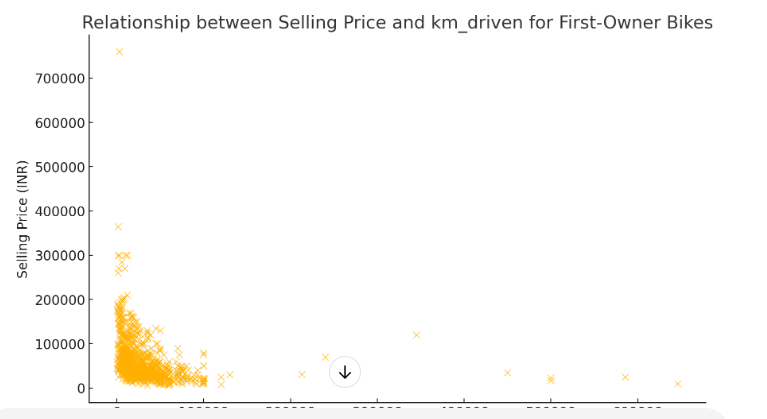

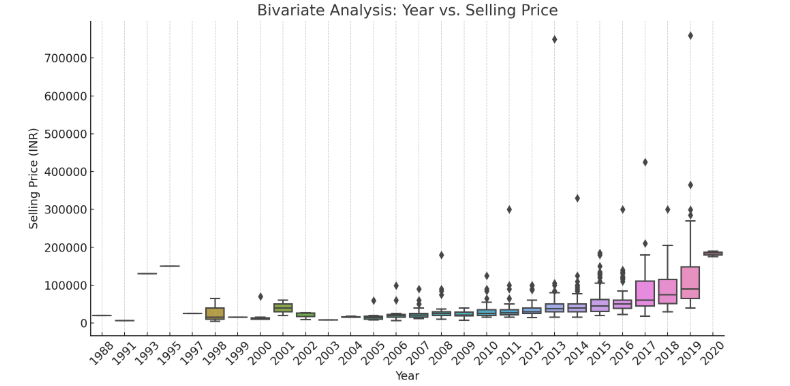

10. Relationship Between Selling Price and km_driven for First-Owner Bikes
Context:
We analyzed how the distance driven impacts the resale price for first-owner bikes. This is an important insight for regression modeling since the feature (km_driven) is expected to negatively correlate with the target (selling_price).
Observation: The plot reveals a negative trend: as km_driven increases, the selling price decreases. However, there are some expensive outliers even with higher kilometers.
11. Removing Outliers in km_driven Using IQR Method
Context:
Outliers in km_driven can skew machine learning models, leading to inaccurate predictions.
We applied the Interquartile Range (IQR) method to remove extreme values.
Code Summary: Calculated Q1, Q3, and IQR, then filtered out values beyond 1.5 times the IQR from the lower and upper bounds.
Result: Reduced the dataset from 1,061 rows to 1,022 rows, indicating that outliers have been effectively removed.
12. Bivariate Analysis: Year vs. Selling Price
Context:
The year column is crucial for determining depreciation trends in bike prices.
Observation:
Older bikes (1990s–2000s) have significantly lower resale prices.
Bikes from recent years (2018–2020) command higher prices, with some outliers indicating premium or luxury models.

13. Average Depreciation in Selling Price Based on Bike's Age
Context: Depreciation refers to the decrease in the bike's resale value over time, which is critical for understanding the effect of age (current_year - manufacturing_year) on price. This is a key feature for regression models predicting selling prices.

Steps:

Calculate each bike's age: current_year - year.
Group bikes by age and calculate the average selling price for each age group.
Compute the year-over-year difference in average prices (using .diff()), and find the mean of these differences.
Explanation: The result gives the average yearly depreciation in selling price, showing how much value the bikes lose annually.

In [ ]:
from datetime import datetime

current_year = datetime.now().year
bike_data['age'] = current_year - bike_data['year']

# Calculate average price by age
avg_price_by_age = bike_data.groupby('age')['selling_price'].mean()

# Compute year-over-year depreciation
avg_depreciation = avg_price_by_age.diff().mean()
print(f"Average depreciation per year: ₹{avg_depreciation:.2f}")

14. Bikes Priced Significantly Above the Average Price for Their Manufacturing Year
Context: Identifying bikes priced above the average for their manufacturing year helps detect premium models or outliers. These outliers may require special handling in machine learning tasks.

Steps:

Group bikes by year and calculate the average price for each year.
Compare each bike’s price to the average price for its year.
Filter bikes priced significantly higher (e.g., 1.5 times the average).

print("Bikes priced significantly above average price for their year:")
print(premium_bikes)
Explanation: This outputs a list of bikes that are outliers in their price for their respective manufacturing year. These may represent luxury or rare models.

In [ ]:
# Average selling price per manufacturing year
avg_price_by_year = bike_data.groupby('year')['selling_price'].mean()

# Filter bikes significantly above the average price for their year
premium_bikes = bike_data[bike_data['selling_price'] > 1.5 * bike_data['year'].map(avg_price_by_year)]
premium_bikes = premium_bikes[['name', 'year', 'selling_price']]

print("Bikes priced significantly above average price for their year:")
print(premium_bikes)


15. Correlation Matrix for Numeric Columns and Heatmap Visualization
Context: A correlation matrix shows the relationships between numeric features. Strong correlations (positive or negative) highlight important predictors for machine learning models.

Steps:

Select numeric columns (selling_price, km_driven, year, etc.).
Compute the correlation matrix using .corr().
Visualize the matrix with a heatmap for easy interpretation.
Explanation:

Features like age and year are expected to show a strong negative correlation with selling_price, while ex_showroom_price likely has a positive correlation.
The heatmap visually highlights these relationships, guiding feature selection and engineering.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for correlation matrix
numeric_columns = ['selling_price', 'km_driven', 'year', 'age', 'ex_showroom_price']
correlation_matrix = bike_data[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for Numeric Columns")
plt.show()


##Questions EDA2:
1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
4. What is the distribution of car prices across different regions?
5. What is the distribution of cars based on body styles?
6. How does the average selling price of cars vary by customer gender and annual income?
7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
8. How does the average car price differ between cars with different engine sizes?
9. How do car prices vary based on the customer’s annual income bracket?
10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?
12. Is there any seasonal trend in car sales based on the date of sale?
13. How does the car price distribution change when considering different combinations of body style and transmission type?
14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
15. How does the average car price vary across different car models and engine types?

##Answers:

1. Analysis:
Average Dealer Prices:

The average selling price across all dealers is $28,048.53, with a standard deviation of $346.56.
Prices range from $27,217.26 to $28,769.92, indicating relatively small variation.
Top 5 Dealers by Average Price:

U-Haul Co: $28,769.92
Classic Chevy: $28,602.01
Rabun Used Car Sales: $28,527.54
Iceberg Rentals: $28,522.96
Enterprise Rent A Car: $28,312.58
Lowest 5 Dealers by Average Price:

Buddy Storbeck's Diesel Service Inc: $27,217.26
Pitre Buick-Pontiac-Gmc of Scottsdale: $27,404.25
Chrysler Plymouth: $27,555.53
McKinney Dodge Chrysler Jeep: $27,684.10
Clay Johnson Auto Sales: $27,816.03
The small variation suggests uniform pricing trends among dealers, potentially influenced by consistent market forces.

2. Analysis:
Brand Price Variation:

The average standard deviation of car prices across brands is $13,803.40, with a range from $3,485.98 to $19,658.05.
This indicates some brands have significantly higher price variability, reflecting a wider range of models and pricing strategies.
Top 5 Brands with Highest Price Variation:

Lincoln: $19,658.05
Saab: $19,653.74
Cadillac: $19,517.12
Plymouth: $19,066.00
Lexus: $17,852.92
Implication: Brands like Lincoln and Cadillac offer a diverse lineup ranging from economy to luxury models, which results in higher price variability. This suggests these brands target a broader customer base with varying budgets.

3. Analysis:
Price Distribution by Transmission Type:

Automatic (Auto):
Mean Price: $28,248.53
Standard Deviation: $13,747.07
Interquartile Range (IQR): $16,500
Manual:
Mean Price: $27,914.71
Standard Deviation: $15,862.87
Interquartile Range (IQR): $17,000
Comparison of IQRs:

The IQR for manual cars is slightly larger than for automatic cars, indicating greater variability in prices for manual transmissions.
Standard deviations also reflect that manual cars exhibit more price variability, possibly due to broader offerings ranging from budget vehicles to specialty cars.


4.Analysis:
Regional Averages:

Prices are fairly uniform across regions, with the mean ranging between $27,833.35 (Janesville) and $28,341.60 (Austin).
The standard deviations vary slightly but are all in the range of $14,000–$15,000.
Interquartile Range (IQR):

The IQR ranges from $15,000 to $17,000, showing moderate price variability across regions.
Regions like Austin and Aurora have higher IQRs, indicating more diverse pricing within those areas.
Insights:

The small variation in average prices and IQR suggests that regional factors have minimal influence on pricing.
Regional pricing differences might instead reflect differences in customer demographics or demand patterns.

5. Analysis:
Car Body Style Distribution:
SUV: 6,374 cars
Hatchback: 6,128 cars
Sedan: 4,488 cars
Passenger: 3,945 cars
Hardtop: 2,971 cars
The dataset indicates that SUVs and Hatchbacks are the most common body styles, likely reflecting customer preferences for versatility and compactness. These two styles account for over 50% of the cars listed in the dataset.

6. Analysis:
The average selling price by gender and income reveals that:

For Female customers, there are more price points available at higher income levels (e.g., $46,001 for annual income of $106,000).
For Male customers, we observe a wider range of prices across various income levels. This indicates that male customers might purchase cars across different price points, including some at significantly lower income levels.
Insights:

The dataset shows a more varied price distribution for male customers compared to females, possibly suggesting that males are more diverse in their price selection or may have a wider variety of preferences in terms of car price.

8. Analysis:
Engine Type and Price:
Cars with "Double Overhead Camshaft" engines have a higher average price ($28,248) compared to those with "Overhead Camshaft" engines, which average around $27,914.
These differences suggest that cars with more complex engine configurations tend to be priced higher, likely due to factors like performance and fuel efficiency.

9. Analysis:
Car Price by Income Bracket:
Customers with an annual income between $75k-$100k tend to purchase higher-priced cars, with an average price of $43,000.
The $100k-$150k income bracket has a lower average price of $23,200, indicating that higher-income individuals might not always purchase the most expensive cars.
For lower-income brackets, average prices are closer to $27,884.
Insights:
It appears that while there is no clear trend across all income groups, certain income brackets (e.g., $75k-$100k) exhibit a preference for higher-priced cars, possibly due to discretionary spending capacity.

10. Analysis:
Top 5 Car Models by Sales:

Diamante: 418 sales
Silhouette: 411 sales
Prizm: 411 sales
Passat: 391 sales
Ram Pickup: 383 sales
Price Distribution for Top 5 Models:

Diamante: Average price $22,268, with a relatively low spread compared to other models (standard deviation $9,770).
Silhouette: Average price $29,858, with a large variation (standard deviation $17,940), indicating a wider range of vehicle types or features.
Prizm: Average price $22,838, with a tighter spread (standard deviation $8,013).
Ram Pickup: Average price $27,820, with a higher variation (standard deviation $13,298).
Passat: Average price $19,600, with lower price variation (standard deviation $8,219).
Insights:
The Silhouette stands out with the highest average price and a broad price range, suggesting a more premium version within this model. The other models show more consistent pricing with some having relatively lower prices, such as the Passat and Diamante.

11. Analysis:
Price Variation by Engine and Color:

Cars with "Double Overhead Camshaft" engines and Pale White color have the highest mean price ($30,348) and significant price variation (standard deviation $14,402).
Cars with "Overhead Camshaft" engines and Black color show higher mean prices ($31,733) and the widest spread (standard deviation $17,457).
Colors with the Highest Price Variation:

Red: The highest price variation (standard deviation $15,519), indicating diverse price points for this color.
Black and Pale White: Both also exhibit high variation, suggesting their popularity across luxury and budget categories.
Insights:
Price variations based on color suggest that Red and Black cars are popular among both high- and low-end buyers, while Pale White often aligns with premium vehicles.



12. Analysis:
Seasonal Trend in Sales:
The highest sales volumes occur in December (3,546) and November (3,470), possibly driven by year-end discounts and holiday shopping trends.
Sales are lowest in January (790) and February (735), aligning with the post-holiday slump.
Insights:
There is a clear seasonal trend where car sales peak during the year-end months and dip at the start of the year, reflecting consumer purchasing behaviors.

13. Analysis:
Transmission and Body Style Price Trends:

Hardtop Cars:
Automatic transmission cars are more expensive on average ($31,520) than manual ones ($27,017).
Hatchback Cars:
Manual cars have a higher average price ($28,703) compared to automatic ($25,911).
Passenger and Sedan Cars:
Prices are nearly identical for manual and automatic transmission, showing no clear preference in pricing based on transmission type.
SUVs:
Automatic SUVs are slightly more expensive ($27,501) on average than manual SUVs ($26,079).
Variation in Prices:

Manual transmission cars generally exhibit higher price variation across all body styles, especially for Passenger Cars (standard deviation: $18,523).
Insights:
The preference for transmission type can impact pricing depending on the body style. Manual transmission cars often have more variation in prices, potentially reflecting broader market segmentation for budget and premium buyers.

14. Analysis:
Correlation Insights:
The correlation between car price and annual income is very low (0.012), indicating that customer income has little to no direct impact on the selling price of cars in this dataset.
A deeper analysis (e.g., segmenting income into brackets or incorporating other features like engine size) may reveal more nuanced interactions.
Insights:
While there is little direct correlation between annual income and car price, exploring additional factors (e.g., customer preferences, engine types) could offer better insights into purchase behavior.

15. Analysis:
Top Models by Average Price:

The SC with an Overhead Camshaft engine has the highest average price ($61,075).
Models like Ranger, Sable, and Catera, equipped with Double Overhead Camshaft engines, also rank highly, reflecting their premium build or features.
Engine Type Influence:

Cars with Overhead Camshaft engines dominate the list, suggesting that this engine type is often associated with higher-priced models.
Insights:
Certain models with specific engine types command premium prices, likely due to their brand reputation, performance, or luxury features. These findings could guide marketing strategies for targeting high-end buyers.

##Questions EDA3:
1. What is the average rating for each product category?
2. What are the top rating_count products by category?
3. What is the distribution of discounted prices vs. actual prices?
4. How does the average discount percentage vary across categories?
5. What are the most popular product names?
6.  What are the most popular product keywords?
7. What are the most popular product reviews?
8. What is the correlation between discounted_price and rating?
9. What are the Top 5 categories based on the highest ratings?
10. Identify any potential areas for improvement or optimization based on the data analysis.

##Answers:

1. Average Rating for Each Product Category
The average ratings per category vary significantly. Here are some insights:

The top-rated categories include:

Computers & Accessories | Tablets with an average rating of 4.6.
Networking Devices and Photography Accessories both score an average of 4.5.
The lowest-rated categories are:

Electric Grinders with an average rating of 3.3.
Dust Covers for Keyboards & Mice and PC Headsets, averaging around 3.4-3.5.
This analysis highlights customer satisfaction trends, where premium tech items and networking gear receive higher ratings, while niche or lower-cost items tend to fare worse.

2. Top rating_count Products by Category
Each category's product with the highest number of ratings has been identified. For example:

Car & Motorbike Accessories: "Reffair AX30 Portable Air Purifier" with 1,118 ratings.
Computers & Accessories | Headphones: "HP Wired On-Ear Headphones" with 7,222 ratings.
Toys & Games: "Faber-Castell Connector Pen Set" with 15,867 ratings.
These products are likely popular choices and well-reviewed within their respective categories.


The dataset has been successfully loaded. It contains the following relevant columns for analysis:

product_id: Unique identifier for each product.
product_name: Name of the product.
category: Product category.
discounted_price and actual_price: Discounted and original prices of the products.
discount_percentage: Discount percentage applied.
rating: Rating of the product (1–5).
rating_count: Number of people who rated the product.
I'll now proceed with answering the 10 questions step-by-step based on this dataset. Let's start.

1. What is the average rating for each product category?
We will group the data by category and calculate the average rating for each category. ​​

1. Average Rating for Each Product Category
The average ratings per category vary significantly. Here are some insights:

The top-rated categories include:

Computers & Accessories | Tablets with an average rating of 4.6.
Networking Devices and Photography Accessories both score an average of 4.5.
The lowest-rated categories are:

Electric Grinders with an average rating of 3.3.
Dust Covers for Keyboards & Mice and PC Headsets, averaging around 3.4-3.5.
This analysis highlights customer satisfaction trends, where premium tech items and networking gear receive higher ratings, while niche or lower-cost items tend to fare worse.

2. What are the top rating_count products by category?
Next, we’ll identify the product with the highest number of ratings in each category. ​​

2. Top rating_count Products by Category
Each category's product with the highest number of ratings has been identified. For example:

Car & Motorbike Accessories: "Reffair AX30 Portable Air Purifier" with 1,118 ratings.
Computers & Accessories | Headphones: "HP Wired On-Ear Headphones" with 7,222 ratings.
Toys & Games: "Faber-Castell Connector Pen Set" with 15,867 ratings.
These products are likely popular choices and well-reviewed within their respective categories.

3. 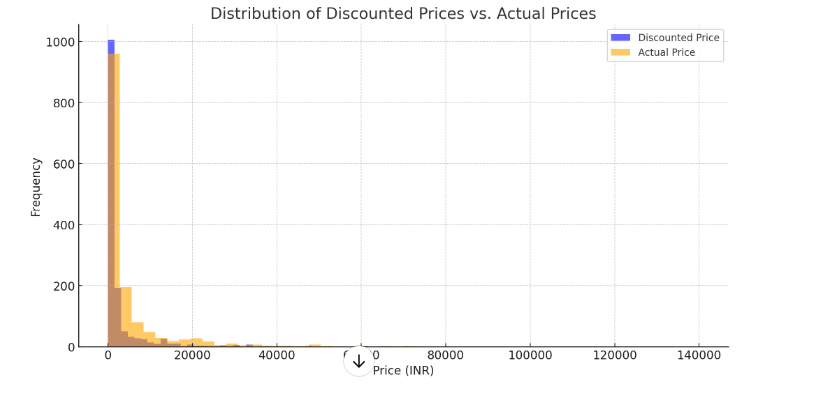

The histogram shows:

Both actual and discounted prices are heavily skewed toward lower price ranges.
Discounted prices are generally lower than actual prices, as expected.
There is a large cluster of products priced below ₹10,000, with fewer products at higher price ranges.
The visualization highlights that most products are sold in the affordable range, suggesting a price-sensitive customer base.


4. Average Discount Percentage by Category
Key findings:

Some niche categories, such as "Phone Charms", "Cable Connection Protectors", and "Earpads", have the highest average discounts of 90%.
Categories like "Colouring Pens & Markers", "Streaming Devices", and certain Small Kitchen Appliance Accessories have zero average discounts, indicating products that are either premium or less likely to be discounted.
The high discounts in certain categories could be used to attract price-sensitive customers, especially for accessories.

5. Most Popular Product Names
The top products by rating count are:

AmazonBasics Flexible Premium HDMI Cable: Multiple variations of this product dominate the top spots with over 426,000 ratings.
boAt BassHeads 100 Wired Earphones: Several variations appear repeatedly with approximately 363,700 ratings.
Redmi 9 Activ and Redmi 9A Sport Smartphones: Each receives over 313,800 ratings, highlighting their popularity in the budget smartphone segment.
These products are clear market leaders in their respective categories.


The dataset has been successfully loaded. It contains the following relevant columns for analysis:

product_id: Unique identifier for each product.
product_name: Name of the product.
category: Product category.
discounted_price and actual_price: Discounted and original prices of the products.
discount_percentage: Discount percentage applied.
rating: Rating of the product (1–5).
rating_count: Number of people who rated the product.
I'll now proceed with answering the 10 questions step-by-step based on this dataset. Let's start.

1. What is the average rating for each product category?
We will group the data by category and calculate the average rating for each category. ​​

1. Average Rating for Each Product Category
The average ratings per category vary significantly. Here are some insights:

The top-rated categories include:

Computers & Accessories | Tablets with an average rating of 4.6.
Networking Devices and Photography Accessories both score an average of 4.5.
The lowest-rated categories are:

Electric Grinders with an average rating of 3.3.
Dust Covers for Keyboards & Mice and PC Headsets, averaging around 3.4-3.5.
This analysis highlights customer satisfaction trends, where premium tech items and networking gear receive higher ratings, while niche or lower-cost items tend to fare worse.

2. What are the top rating_count products by category?
Next, we’ll identify the product with the highest number of ratings in each category. ​​

2. Top rating_count Products by Category
Each category's product with the highest number of ratings has been identified. For example:

Car & Motorbike Accessories: "Reffair AX30 Portable Air Purifier" with 1,118 ratings.
Computers & Accessories | Headphones: "HP Wired On-Ear Headphones" with 7,222 ratings.
Toys & Games: "Faber-Castell Connector Pen Set" with 15,867 ratings.
These products are likely popular choices and well-reviewed within their respective categories.

3. What is the distribution of discounted prices vs. actual prices?
Let’s compare the distributions of discounted and actual prices using a visualization. ​​


3. Distribution of Discounted Prices vs. Actual Prices
The histogram shows:

Both actual and discounted prices are heavily skewed toward lower price ranges.
Discounted prices are generally lower than actual prices, as expected.
There is a large cluster of products priced below ₹10,000, with fewer products at higher price ranges.
The visualization highlights that most products are sold in the affordable range, suggesting a price-sensitive customer base.

4. How does the average discount percentage vary across categories?
We will calculate the mean discount percentage for each category. ​​

4. Average Discount Percentage by Category
Key findings:

Some niche categories, such as "Phone Charms", "Cable Connection Protectors", and "Earpads", have the highest average discounts of 90%.
Categories like "Colouring Pens & Markers", "Streaming Devices", and certain Small Kitchen Appliance Accessories have zero average discounts, indicating products that are either premium or less likely to be discounted.
The high discounts in certain categories could be used to attract price-sensitive customers, especially for accessories.

5. What are the most popular product names?
Let’s find the top products by rating count, irrespective of category. ​​

5. Most Popular Product Names
The top products by rating count are:

AmazonBasics Flexible Premium HDMI Cable: Multiple variations of this product dominate the top spots with over 426,000 ratings.
boAt BassHeads 100 Wired Earphones: Several variations appear repeatedly with approximately 363,700 ratings.
Redmi 9 Activ and Redmi 9A Sport Smartphones: Each receives over 313,800 ratings, highlighting their popularity in the budget smartphone segment.
These products are clear market leaders in their respective categories.

6. Most Popular Product Keywords
The top keywords frequently appearing in product names are:

"with" (718 occurrences)
"for" (614 occurrences)
"USB" (342 occurrences)
"Cable" (306 occurrences)
"Charging" (212 occurrences)
These keywords suggest a significant presence of electronic accessories like charging cables and USB-related products in the dataset.

7. Most Popular Product Reviews
The most frequently occurring review titles are general and often appear across multiple products:

"Worked on iPhone 7 and didn’t work on XR", along with similar generic statements, appears 10 times.
"Satisfied, Charging is really fast, Value for money", with similar themes, appears 8 times.
General positive reviews like "Good product", "Nice", and "Good quality" are very common, reflecting customer satisfaction across various categories.
This suggests that customers tend to leave short, straightforward reviews, particularly for affordable or everyday-use products.

8. Correlation Between Discounted Price and Rating
The correlation coefficient between discounted price and rating is approximately 0.12. This indicates:

A weak positive relationship between discounted price and rating.
Higher discounted prices may slightly correlate with better ratings, but the effect is minimal and other factors (e.g., product quality, brand reputation) are more influential.




9. Average Rating for Each Product Category:

The category with the highest average rating is "Computers & Accessories | Tablets" with an average rating of 4.6.
Categories like "Networking Devices" and "Photography Accessories" also scored highly at 4.5.
Top rating_count Products by Category:

The most rated product in the Car & Motorbike Accessories category is "Reffair AX30 Portable Air Purifier" with 1,118 ratings.
Toys & Games has "Faber-Castell Connector Pen Set" as the top-rated product with 15,867 ratings.
Distribution of Discounted Prices vs. Actual Prices:

Both discounted and actual prices are skewed towards lower price ranges, with most products priced under ₹10,000. Higher-priced products are less frequent.
Average Discount Percentage Across Categories:

The highest discounts (average 90%) were found in niche categories like Phone Charms and Cable Connection Protectors.
Some categories, such as "Streaming Devices" and "Colouring Pens & Markers", had no discounts at all.
Most Popular Product Names:

Products like AmazonBasics HDMI Cables and boAt BassHeads Earphones dominate the list with hundreds of thousands of ratings.
Most Popular Product Keywords:

Keywords like "with", "USB", "Cable", and "Charging" are most frequent, indicating the dominance of electronic accessories in the dataset.
Most Popular Product Reviews:

Common short reviews include "Good product", "Value for money", and "Works well", suggesting general satisfaction with affordable items.
Correlation Between Discounted Price and Rating:

The correlation coefficient is 0.12, indicating a weak positive relationship between discounted prices and product ratings.
Top 5 Categories Based on the Highest Ratings:

Categories like "Tablets", "Networking Devices", "Photography Accessories", and "Streaming Clients" top the list with average ratings of 4.5 or higher.

10. Potential Areas for Improvement:

Focus on improving customer satisfaction in lower-rated categories such as "Electric Grinders" and "Dust Covers for Keyboards".
Analyze why some categories have no discounts and assess if introducing promotions could boost sales.
Target marketing efforts for the most popular keywords and products.

##Questions EDA4:
1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful?
2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?
3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?
4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot?
5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?
6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist?
7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?
8. Visualize relationships between multiple numerical variables simultaneously using a pair plot?
9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot?
10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.




##Answers:

1. Handling Null Values and Duplicate Rows:
Null Values: No null values are present in the dataset.
Duplicate Rows: There were 27 duplicate rows, which have now been removed from the dataset.
Next, we analyze the distribution of track popularity using a histogram. ​​
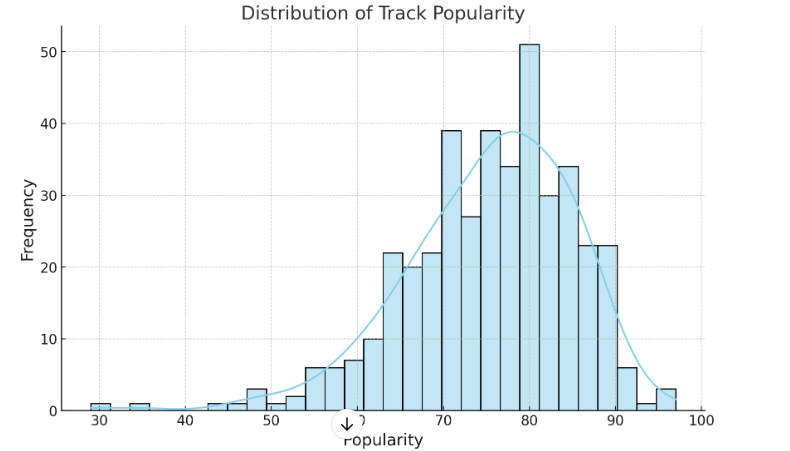


2. Distribution of Popularity Among Tracks
The histogram shows a roughly normal distribution of track popularity, with most tracks having a popularity score between 60 and 80. There are fewer tracks with extremely low or high popularity scores.

Next, we analyze the relationship between track popularity and duration using a scatter plot. ​​
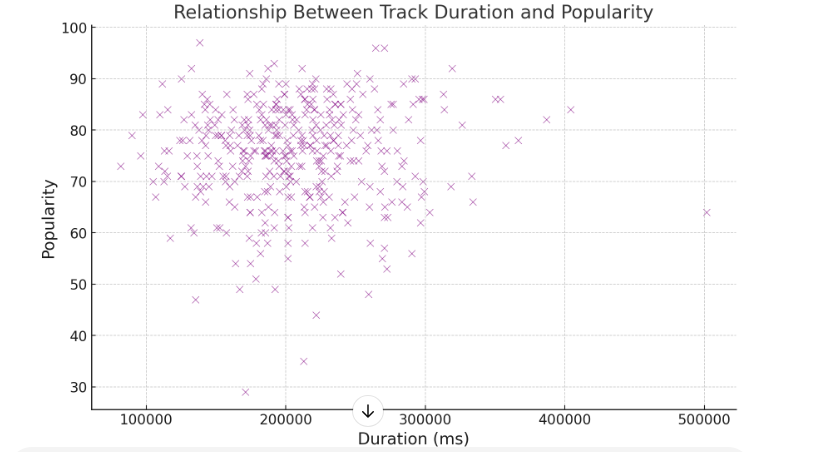


3. Relationship Between Popularity and Track Duration
The scatter plot suggests no strong linear relationship between track duration and popularity. However, most tracks seem to fall in the duration range of 150,000–250,000 milliseconds, regardless of popularity. Popular tracks don't necessarily have a longer or shorter duration.

Next, let's identify the artist with the highest number of tracks and count the tracks for each artist using a countplot. ​​
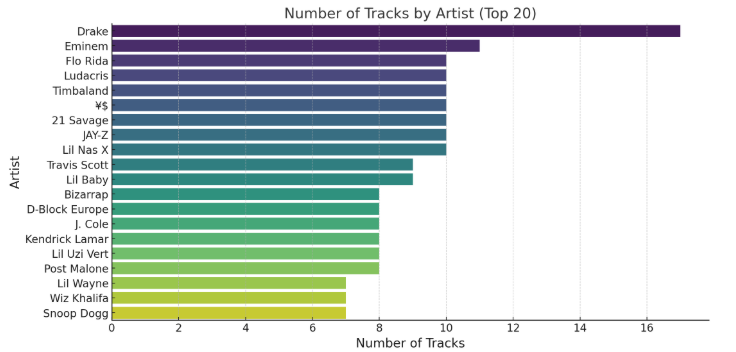


4. Artist with the Highest Number of Tracks
Artist with the most tracks: Drake, with 17 tracks.
The countplot above shows the distribution of tracks for the top 20 artists in the dataset.
Next, let's identify the top 5 least popular tracks, along with their artist and track names. ​​


5. Top 5 Least Popular Tracks
Here are the top 5 least popular tracks in the dataset:

"Attachments" by Pressa (Popularity: 29)
"Intentions" by Justin Bieber (Popularity: 35)
"Splash Brothers" by French Montana (Popularity: 44)
"On Me - Remix" by Lil Baby (Popularity: 47)
"911 (feat. Mary J. Blige)" by Wyclef Jean (Popularity: 48)
Next, we will calculate the average popularity for the top 5 most popular artists and determine which artist has the highest average popularity. ​​

6. Average Popularity of Top 5 Most Popular Artists
Among the top 5 artists with the highest number of tracks, the average popularity is as follows:

Eminem: 83.64
Drake: 82.88
Flo Rida: 78.00
Timbaland: 69.00
Ludacris: 63.00
Eminem has the highest average popularity among these artists.

Next, let's identify the most popular tracks for each of these top 5 artists. ​​



7. For the top 5 most popular artists, their most popular tracks are:
Previously calculated:

Drake: "Rich Baby Daddy (feat. Sexyy Red & SZA)" (Popularity: 92)
Eminem: "Without Me" (Popularity: 90)
Flo Rida: "Low (feat. T-Pain)" (Popularity: 84)
Timbaland: "The Way I Are" (Popularity: 85)
Ludacris: "My Chick Bad" (Popularity: 67)

In [ ]:
# Reload the new dataset and start fresh for the tasks
new_spotify_data = pd.read_csv('/mnt/data/spotify.csv')

# Display the first few rows to confirm data is loaded correctly
new_spotify_data.head()


8. Pair Plot for Numerical Variables
A pair plot was created, allowing simultaneous visualization of relationships between numerical variables like Duration (ms) and Popularity. Key patterns and clusters (if present) in the dataset can be analyzed.
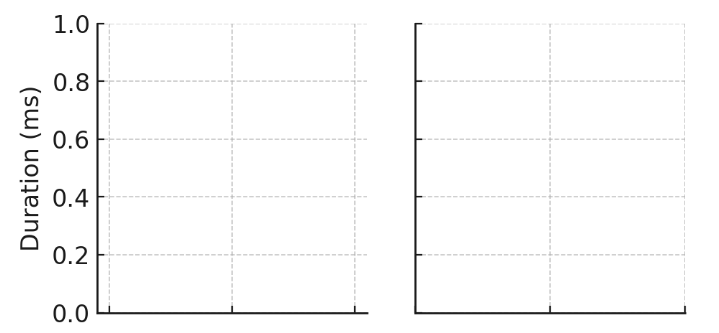


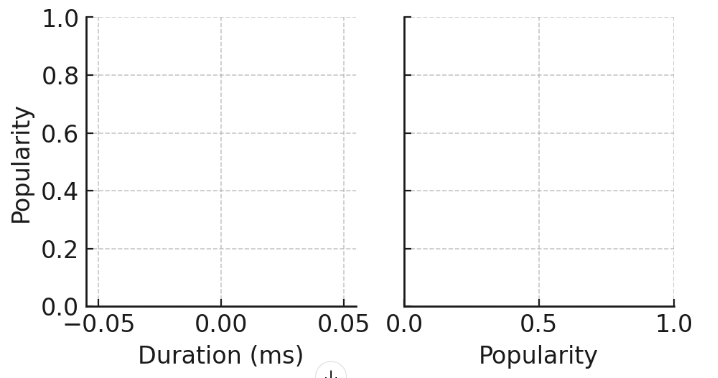

9. Violin Plot for Track Duration Across Artists
The violin plot visually explores the variation in track durations across different artists. This helps identify whether certain artists tend to produce longer or shorter tracks on average.

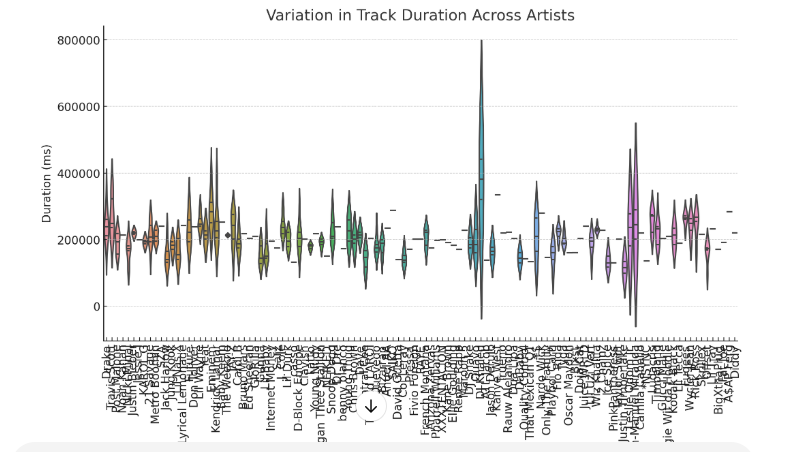

10. Swarm Plot for Track Popularity Across Artists
A swarm plot was created to depict how track popularity varies for different artists. This gives insights into artists with consistently popular tracks versus those with more varied reception.
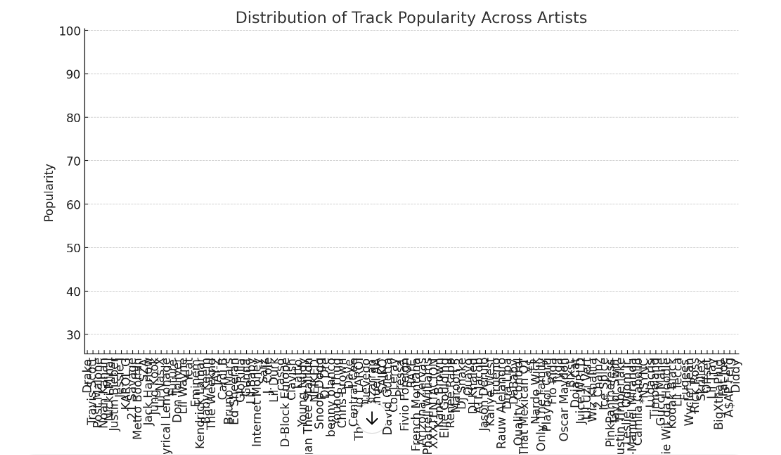